Q15 至少n次的词

In [158]:
import nltk
from nltk.corpus import brown

In [4]:
fdist  = nltk.FreqDist( w.lower() for w in brown.words())

In [11]:
words = [w for w in fdist if fdist[w]>=3]

Q16 词汇多样性

In [4]:
for genre in brown.categories():
    w = brown.words(categories=genre)
    x = len(w)
    y = len(set(w))
    print '%s, %d, %d, %f' % (genre, x, y, (x *1./ y))

adventure, 69342, 8874, 7.814064
belles_lettres, 173096, 18421, 9.396667
editorial, 61604, 9890, 6.228918
fiction, 68488, 9302, 7.362718
government, 70117, 8181, 8.570713
hobbies, 82345, 11935, 6.899455
humor, 21695, 5017, 4.324297
learned, 181888, 16859, 10.788778
lore, 110299, 14503, 7.605254
mystery, 57169, 6982, 8.188055
news, 100554, 14394, 6.985827
religion, 39399, 6373, 6.182175
reviews, 40704, 8626, 4.718757
romance, 70022, 8452, 8.284666
science_fiction, 14470, 3233, 4.475719


Q17 文本中最常出现词 

In [156]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [17]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
def max_freq(text, num):
    fdist = FreqDist([w.lower() for w in text if w.isalpha() and w.lower() not in stopwords])
    return fdist.most_common()[:num]

In [18]:
max_freq(text1,10)

[(u'whale', 1226),
 (u'one', 921),
 (u'like', 647),
 (u'upon', 566),
 (u'man', 527),
 (u'ship', 518),
 (u'ahab', 511),
 (u'ye', 472),
 (u'sea', 455),
 (u'old', 450)]

Q18 文本中最常出现双连词

In [28]:
def max_freq_bi(text, num):
    stopwords = nltk.corpus.stopwords.words('english')
    bigrams = nltk.bigrams([w.lower() for w in text if w.isalpha() and w not in stopwords])
    fdist = FreqDist((w1, w2) for (w1,w2) in bigrams)
    return fdist.most_common()[:num]

In [29]:
max_freq_bi(text2, 10)

[((u'mrs', u'jennings'), 230),
 ((u'colonel', u'brandon'), 132),
 ((u'mrs', u'dashwood'), 121),
 ((u'sir', u'john'), 112),
 ((u'lady', u'middleton'), 95),
 ((u'every', u'thing'), 80),
 ((u'i', u'sure'), 79),
 ((u'i', u'know'), 79),
 ((u'mrs', u'ferrars'), 75),
 ((u'i', u'think'), 71)]

Q20

In [2]:
def word_freq(word, genre):
    fdist = nltk.FreqDist([w.lower() for w in brown.words(categories=genre)])
    return fdist[word]

In [9]:
word_freq("love", "romance")

36

Q21 CMU发音词典估算文本中音节数

In [12]:
from nltk.corpus import cmudict

In [31]:
cmu_dict =  cmudict.dict()
cmu_word =  cmudict.words()
def syllable(text):
    cnt = 0
    for w in text:
        if w.isalpha() and w.lower() in cmu_word: 
            cnt += len(cmu_dict[w.lower()][0])
    return cnt

In [32]:
syllable(text2)

426005

Q22 在文本中每三个词插入一个单词

In [36]:
def hedge(text):
    new_text = []
    cnt = 0
    for w in text:
        if(cnt!=0 and cnt%3 ==0):
            new_text.append('like')
        new_text.append(w)
        cnt += 1
    return new_text

In [38]:
test = ["Your", "friend", "looks", "a", "genius" ]
hedge(test)

['Your', 'friend', 'looks', 'like', 'a', 'genius']

Q23 齐夫定律

In [60]:
import numpy as np

def zipf(text, num):
    fdist = FreqDist([w.lower() for w in text if w.isalpha()])
    flist = fdist.most_common()
    x = []
    y = []
    for i in range(num):
        x.append(i+1)
        y.append(np.log(flist[i][1]))
    pylab.plot(x, y)
    return pylab.show()

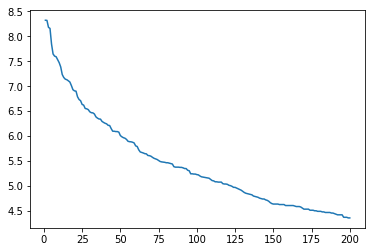

In [62]:
zipf(text2, 200)

In [77]:
def zipf_rdm(text, length):
    n = 0
    gen_text = ''
    while n < length:
        gen_text = gen_text + ' ' + random.choice(text)
        n += 1
    gen_text = gen_text.split()
    return zipf(gen_text, 200)

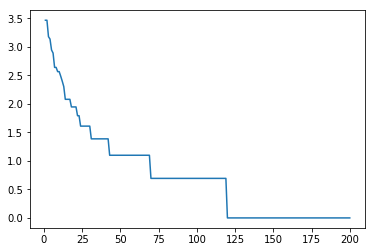

In [78]:
zipf_rdm(text2, 1000)

Q25

In [6]:
from nltk.corpus import udhr

In [23]:
def find_language(string):
    file_list = [] 
    for lang in udhr.fileids():
        if lang.endswith('-Latin1'):
            if (string.lower() in [w.lower() for w in udhr.words(lang)]):
                file_list.append(lang)
    return file_list

In [28]:
find_language('him')

[u'English-Latin1', u'Frisian-Latin1', u'Luxembourgish_Letzebuergeusch-Latin1']

Q26 平均下位词

In [2]:
from nltk.corpus import wordnet as wn

<generator object all_synsets at 0x7fc4a990b8c0>

In [16]:
def aver_nyms():
    cnt = 0
    total = 0
    for synset in wn.all_synsets('n'):    
        cnt += 1
        total += len(synset.hypernyms())
    return total*1.0/cnt 

aver_nyms()

0.9237045606770992

Q27

In [118]:
len(wn.synsets('dog','n'))

7

In [130]:
def diversity(pos = 'n'):
    cnt = 0
    total = 0
    for synset in wn.all_synsets(pos):
        total += len(wn.synsets(synset.lemma_names()[0], 'n'))
        cnt += 1
    return round(total*1./cnt,2)

In [131]:
diversity()

1.97

In [132]:
diversity('v')

2.3

In [133]:
diversity('a')

0.44

In [134]:
diversity('r')

0.22

In [137]:
# some adj/adv words has no meaning
len(wn.synsets('the','v'))

0

Q28

In [147]:
string = 'car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string'
pairs = string.split(', ')

In [148]:
similarity = dict()
for item in pairs:
    pair = item.split('-')
    i = wn.synset(pair[0] + '.n.01')
    j = wn.synset(pair[1] + '.n.01')
    similarity[item] = i.path_similarity(j)

In [154]:
import operator
sorted(similarity.items(), key=operator.itemgetter(1), reverse=True)

[('midday-noon', 1.0),
 ('car-automobile', 1.0),
 ('tool-implement', 0.5),
 ('coast-shore', 0.5),
 ('boy-lad', 0.3333333333333333),
 ('journey-voyage', 0.25),
 ('coast-hill', 0.2),
 ('lad-wizard', 0.2),
 ('monk-slave', 0.2),
 ('shore-woodland', 0.2),
 ('magician-wizard', 0.16666666666666666),
 ('lad-brother', 0.14285714285714285),
 ('brother-monk', 0.125),
 ('monk-oracle', 0.125),
 ('asylum-madhouse', 0.125),
 ('gem-jewel', 0.125),
 ('cemetery-woodland', 0.1111111111111111),
 ('bird-crane', 0.1111111111111111),
 ('glass-magician', 0.1111111111111111),
 ('crane-implement', 0.1),
 ('chord-smile', 0.09090909090909091),
 ('food-fruit', 0.09090909090909091),
 ('coast-forest', 0.09090909090909091),
 ('furnace-stove', 0.07692307692307693),
 ('forest-graveyard', 0.07142857142857142),
 ('bird-cock', 0.0625),
 ('food-rooster', 0.0625),
 ('noon-string', 0.058823529411764705),
 ('journey-car', 0.05),
 ('rooster-voyage', 0.041666666666666664)]